# 5.1. (mandatory) Determine number and composition (i.e. list of nodes) of the communities obtained applying one of the algorithms introduced during the course.

In [1]:
import community
import pyedflib
import numpy as np
import networkx as nx
import community
import community_newman
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# DATA
def import_data(filename):
    f = pyedflib.EdfReader(filename)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    signal_labels = [sl.replace('.','') for sl in signal_labels]
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    return sigbufs, signal_labels

eyes_open, olabels = import_data('D:/DataScience/BI/HW03/S059R01.edf')
eyes_closed, clabels  = import_data('D:/DataScience/BI/HW03/S059R02.edf')

In [3]:
# pdc
Ao_pdc = np.loadtxt('D:/DataScience/BI/HW03/Ao_pdc.txt')
Go_pdc = nx.from_numpy_matrix(Ao_pdc, create_using=nx.DiGraph())
Ac_pdc = np.loadtxt('D:/DataScience/BI/HW03/Ac_pdc.txt')
Gc_pdc = nx.from_numpy_matrix(Ac_pdc, create_using=nx.DiGraph())

# dtf
Ao_dtf = np.loadtxt('D:/DataScience/BI/HW03/Ao_dtf.txt')
Go_dtf = nx.from_numpy_matrix(Ao_dtf, create_using=nx.DiGraph())
Ac_dtf = np.loadtxt('D:/DataScience/BI/HW03/Ac_dtf.txt')
Gc_dtf = nx.from_numpy_matrix(Ac_dtf, create_using=nx.DiGraph())

In [4]:
partitions = []
communities = []
Gs = [Go_pdc,Gc_pdc,Go_dtf,Gc_dtf]
for graph in Gs:
    partitions += [community_newman.partition(graph)]
    communities += [list(set(partitions[-1].values()))]

In [5]:
communities

[[2, 3, 4], [3, 4, 5, 6], [1, 3, 5, 6], [3, 4, 5, 6]]

In [6]:
community_list = []
for graph in range(4):
    community_list += [{c: [] for c in communities[graph]}]
    for node in Gs[graph].nodes():
        community_list[graph][partitions[graph][node]] += [olabels[node]]

In [7]:
community_list[0]

{2: ['Fc5',
  'Fc3',
  'Fc1',
  'Fcz',
  'Fc4',
  'Fc6',
  'C4',
  'C6',
  'Fp1',
  'Fpz',
  'Fp2',
  'Af7',
  'Af3',
  'Afz',
  'Af8',
  'F7',
  'F5',
  'F3',
  'F1',
  'Fz',
  'F2',
  'F4',
  'F6',
  'F8',
  'Ft7',
  'Ft8',
  'T7',
  'T8',
  'T9',
  'T10'],
 3: ['Fc2',
  'C2',
  'Cpz',
  'Cp2',
  'Cp6',
  'Tp8',
  'P3',
  'P1',
  'Pz',
  'P2',
  'P4',
  'P6',
  'P8',
  'Po7',
  'Po3',
  'Poz',
  'Po4',
  'Po8',
  'O1',
  'Oz',
  'O2',
  'Iz'],
 4: ['C5',
  'C3',
  'C1',
  'Cz',
  'Cp5',
  'Cp3',
  'Cp1',
  'Cp4',
  'Af4',
  'Tp7',
  'P7',
  'P5']}

# 5.2. (class ‘B’) Make a graphical representation of the community structure in both rest conditions.

In [8]:
# COLORS 
colors = [(1,0,0,1),(0,1,0,1),(0,0,1,1),(1,1,0,1),(1,0,1,1),(0,1,1,1)]
NC = []
for i in range(4):
    nc = []
    for node in Gs[i].nodes():
        #print(node,community)
        nc += [colors[communities[i].index(partitions[i][node])]]
    NC += [nc]

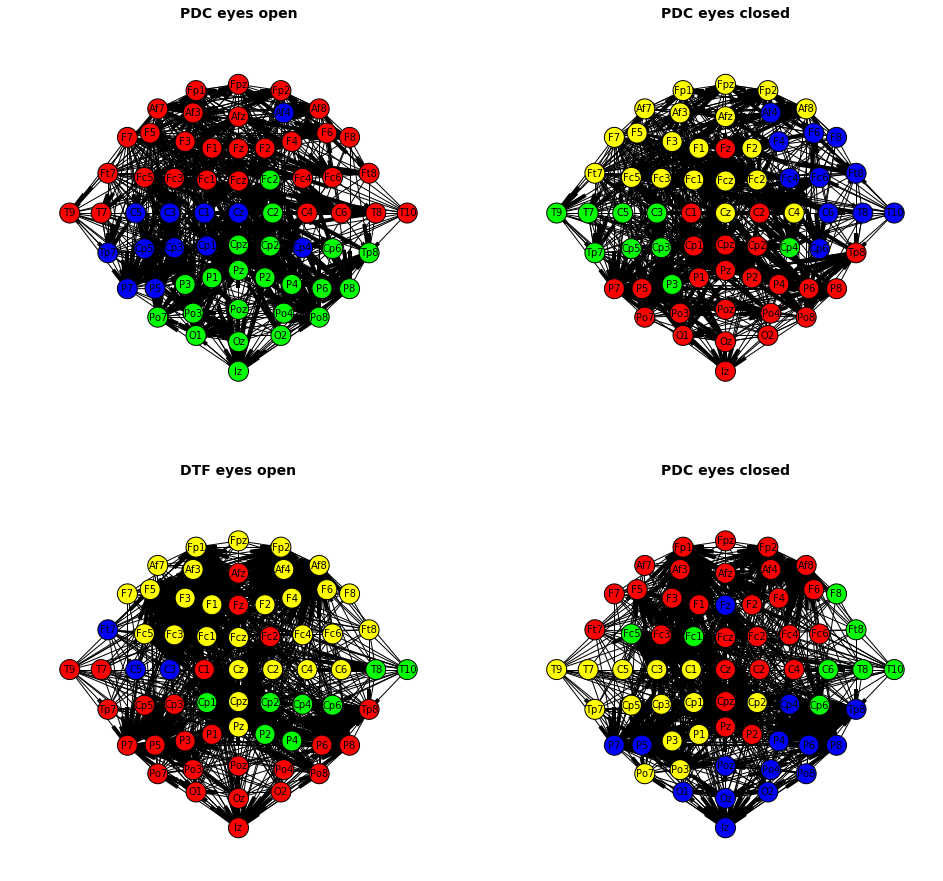

In [10]:
nc = (.5,.72,.8,1)
channel_locations = pd.read_csv('D:/DataScience/BI/HW03/channel_locations.txt', sep='\t')
pos = {n: (channel_locations['x'][n],channel_locations['y'][n]) for n in range(64)}

plt.figure(figsize=(16, 15))

plt.subplot(221)
plt.xlim(-.6,.6)
labels = {i: olabels[i] for i in range(len(olabels))}
nx.draw(Gs[0], pos, node_size = 400, node_color = NC[0])
nx.draw_networkx_labels(Gs[0], pos, labels, font_size=10)
plt.title('PDC eyes open', fontsize=14, fontweight='bold')

plt.subplot(222)
plt.xlim(-.6,.6)
labels = {i: olabels[i] for i in range(len(olabels))}
nx.draw(Gs[1], pos, node_size = 400, node_color = NC[1])
nx.draw_networkx_labels(Gs[1], pos, labels, font_size=10)
plt.title('PDC eyes closed', fontsize=14, fontweight='bold')

plt.subplot(223)
plt.xlim(-.6,.6)
labels = {i: olabels[i] for i in range(len(olabels))}
nx.draw(Gs[2], pos, node_size = 400, node_color = NC[2])
nx.draw_networkx_labels(Gs[2], pos, labels, font_size=10)
plt.title('DTF eyes open', fontsize=14, fontweight='bold')

plt.subplot(224)
plt.xlim(-.6,.6)
labels = {i: olabels[i] for i in range(len(olabels))}
nx.draw(Gs[3], pos, node_size = 400, node_color = NC[3])
nx.draw_networkx_labels(Gs[3], pos, labels, font_size=10)
plt.title('PDC eyes closed', fontsize=14, fontweight='bold')


plt.savefig('D:/DataScience/BI/HW03/5.2-communities.png') 
plt.savefig('D:/DataScience/BI/HW03/5.2-communities.eps') 
plt.show()